In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]
eigenvalores [0.0490834  1.28402771]
eigenvectores [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


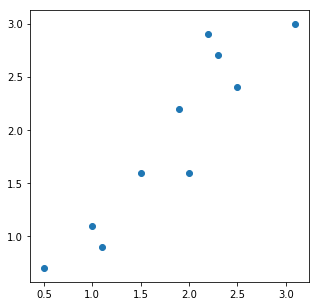

In [19]:
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
data = np.vstack([x,y])
cov = np.cov(x,y)
eigen = np.linalg.eig(cov)
mat = np.matrix(eigen[1])
plt.figure(figsize=(5,5))
plt.scatter(x,y)
print cov
print 'eigenvalores', eigen[0]
print 'eigenvectores', eigen[1]#[0,0]

In [20]:
print mat, data

[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]] [[2.5 0.5 2.2 1.9 3.1 2.3 2.  1.  1.5 1.1]
 [2.4 0.7 2.9 2.2 3.  2.7 1.6 1.1 1.6 0.9]]


In [21]:
print new_data[1]
print new_data[1][::-1]


NameError: name 'new_data' is not defined

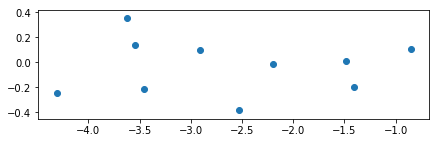

In [22]:
new_data = np.asarray(np.matmul(np.transpose(mat), data))
plt.figure(figsize=(7,2))
plt.scatter(new_data[1],new_data[0])

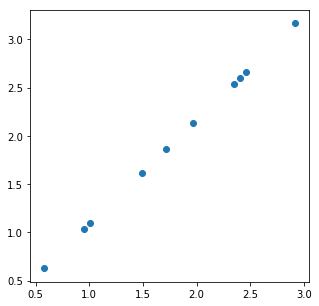

In [23]:
data_reduced = np.asarray(np.matmul(np.transpose(np.matrix([mat[0,1],mat[1,1]])),(np.matrix(new_data[1]))))
plt.figure(figsize=(5,5))
plt.scatter(data_reduced[0],data_reduced[1])

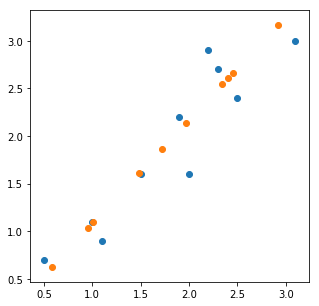

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.scatter(data_reduced[0],data_reduced[1])

# Funcion bines EoS DE

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#w_i = [-1,-1.2,-1.1,-0.9,-1.1,-0.9,-0.7,-1.5]

w_i = [1,  1,  1,  1,  1,  1,  2,  2]
z_i = [0,0.1,0.2,0.4,0.6,0.8,1.0,1.3,2.5]

#w_i = [1,3,2,1]
#z_i = [0,2.4,2.9,2.5,3]

z=np.linspace(0.0,4,100)
print len(w_i)
print len(z_i)
print len(z)

8
9
100


[1, 1, 1, 1, 1, 1, 2, 2]


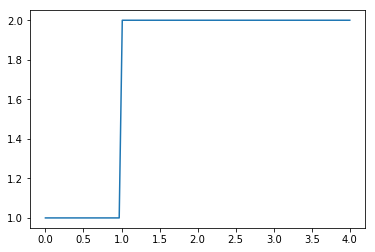

In [4]:
#intento del peiper,smoothing funct https://www.j-raedler.de/2010/10/smooth-transition-between-functions-with-tanh/
w_z=[]
def bines(w_2,w_1,z_2,z_1,eta):
    return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2

for ii in range(len(z)):
    w=w_i[0]
    for jj in range(len(w_i)-1):
        w+=bines(w_i[jj+1],w_i[jj],z[ii],z_i[jj+1],0.001)
    w_z.append(w)
print w_i
plt.plot(z,w_z)

In [5]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


#ecuacion de estado de la energia oscura en forma de bines

def eos(z, xi):
    w_i = [-1 ,-1.2 ,-1.1 ,-0.9 ,-1.1 ,-0.9,-0.7,-1.5]
    #w_i = [1,1,1,1,1,1,2,2]
    z_i = np.linspace(0.0,3.0,len(w_i)+1)
    #z_i = [0  ,0.1  ,0.2  , 0.4 , 0.6 , 0.8, 1.0 ,1.3]
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=w_i[0]
    for jj in range(len(w_i)-1):
        w+=bines(w_i[jj+1],w_i[jj],z,z_i[jj+1],xi)
    return w

y = [-1 ,-1.2 ,-1.1 ,-0.9 ,-1.1 ,-0.9,-0.7,-1.5]
x = np.linspace(0.0,2.625,len(y))
d = (x[1]-x[0])/2.
x = np.linspace(0.0+d,2.625+d,len(y))
f = interp1d(x, y, kind='linear')
    

In [6]:
y

[-1, -1.2, -1.1, -0.9, -1.1, -0.9, -0.7, -1.5]

In [7]:
#valor de la integral para la rho de la energia oscura
z_intervalo=2.5
#quad(lambda b: 3.0*(1.0+eos(b))/(1.0+b),0.0,z_intervalo)[0]
r=quad(lambda b: eos(b,0.01)/2.0,0.0,z_intervalo)[0]
print r

-1.25


In [8]:
eos(0.986,0.01)
np.linspace(0.0,3.0,5)

array([0.  , 0.75, 1.5 , 2.25, 3.  ])

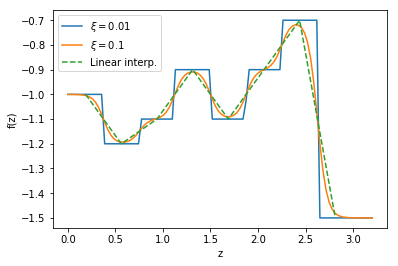

In [13]:
z=np.linspace(0.0,3.2,100)
plt.plot(z,eos(z,0.001))
plt.plot(z,eos(z,0.1))
plt.plot(x,f(x), linestyle='--')
plt.ylabel(r'f(z)')
plt.xlabel(r'z')
plt.legend((r'$\xi = 0.01$',r'$\xi = 0.1$',r'Linear interp.'))
#plt.savefig('different_xi.pdf')

In [10]:
eos(2)

-1.5

In [9]:
#aqui ya esta la funcion lista en una sola definicion que devuelve el valor de la integral para SimpleMC
def luisfunction(z_l):
    def eos(z):
        w_i = [-1,-1.2,-1.1,-0.9,-1.1,-0.9,-0.7,-1.5]
        z_i = [0,0.1,0.2,0.4,0.6,0.8,1.0,1.3,2.5]
        def bines(w_2,w_1,z_2,z_1,eta):
            return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
        w=w_i[0]
        for jj in range(len(w_i)-1):
            w+=bines(w_i[jj+1],w_i[jj],z,z_i[jj+1],0.001)
        return w
    return quad(lambda b: 3*(1+eos(b))/(1+b),0,z_l)[0]

In [10]:
luisfunction(3.0)

C:\Users\52811\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  if sys.path[0] == '':


-0.7664116149656833

In [103]:
#aqui ya esta la funcion lista en una sola definicion que devuelve el valor de la integral para SimpleMC
#pero aqui esta por partes, en lugar de estar definida en una sola funcion
def bines(w_2,w_1,z_2,z_1,eta):
    return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2

def eos(z):
    w_i = [-10,10,-1,-1,-1,-1,-1,-20]
    z_i = [0,0.1,0.2,0.4,0.6,0.8,1.0,1.3,2.5]        
    w=w_i[0]
    for jj in range(len(w_i)-1):
        w+=bines(w_i[jj+1],w_i[jj],z,z_i[jj+1],0.001)
    return w


def luisfunction(z_l):
    return quad(lambda b: 3*(1+eos(b))/(1+b),0,z_l)[0]

def hz(a):
    z=1.0/a -1
    return (0.28/a**3+(0.7)*(np.exp(luisfunction(z))))

In [104]:
luisfunction(0.79)

0.2980115536020208

In [105]:
np.exp(luisfunction(0.79))

1.3471773525406225

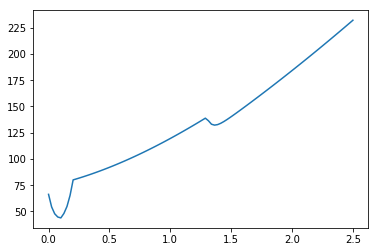

In [108]:
#prueba graficando el parametro de jobol (hubble)

hubble=[]
aa =[]
for ii in range(len(z)):
    aa.append(1.0/(1.0+z[ii]))
    hubble.append(67*(hz(aa[ii])**0.5))
plt.plot(z,hubble)

# Interpolacion

In [4]:
from scipy.interpolate import interp1d
from scipy.integrate import quad
def luisfunction(z):
        if (z>=0.0 and z<=3.0):
            y = [ 2.0, 2.0, 2.0,  0.0]
            x = [ 0.0, 1.0, 2.0,  3.0]
            f = interp1d(x, y, kind='linear')
            rhow = f(z)
        else:
            rhow = -1.0
        resultado = quad(lambda b: rhow, 0.0, z )
        return resultado[0]

In [5]:
luisfunction(3.0)

0.0

In [172]:
y = [ 2.0, 2.0, 2.0,  1.0]
x = [ 0.0, 1.0, 2.0,  3.0]
f = interp1d(x, y, kind='linear')
rhow = f(3)

In [173]:
quad(lambda b: rhow, 0.0, 3 )[0]

3.0

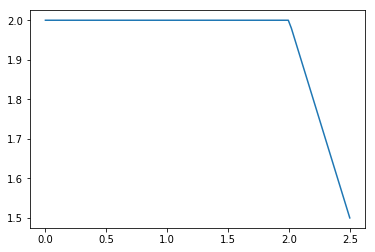

In [174]:
plt.plot(z,f(z))

# Prueba iris-setosa

In [6]:
import pandas as pd

# load dataset into Pandas DataFrame
df = pd.read_csv('iris.data', names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


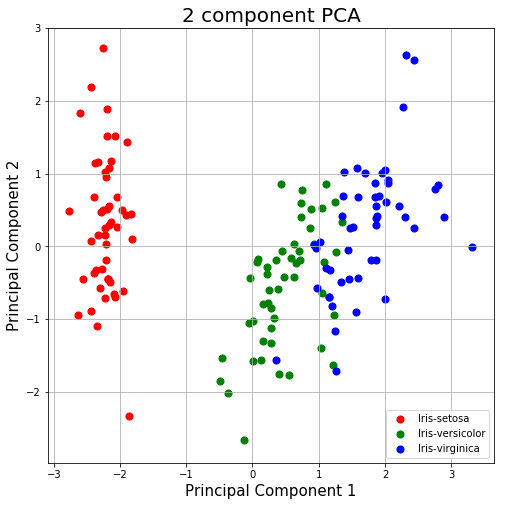

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Prueba cadenas owaCDM

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
dir_name = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_pca\\'

num_cadenas = 4

df1=pd.DataFrame()

for i in range(num_cadenas):
    dg = pd.read_csv(dir_name+'owaCDM2_phy_BBAO+SN+HD_'+str(i+1)+'.txt', sep='\s+', names=range(21))
    df1 = pd.concat([df1,dg])
    

df1.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,3.422770e-08,34.3805,0.273375,0.022570,0.671650,-1.210200,-0.783771,-0.931326,-1.20521,-1.08229,...,-1.38604,-0.091940,-1.38050,-0.872042,-1.90805,-0.000202,-1.024780,-17.4259,-10.9613,-0.715721
1,2.519780e-08,36.3793,0.270702,0.022534,0.650538,-1.202980,-0.768726,-0.855344,-1.22204,-1.06058,...,-1.43862,-0.750095,-1.20097,-0.554546,-2.66105,-0.021655,-0.557827,-17.7322,-12.2770,-0.624025
2,1.851770e-08,35.6091,0.289326,0.022395,0.660180,-1.087100,-0.730883,-0.962856,-1.03140,-1.14549,...,-1.26045,-0.019958,-2.79618,-1.348600,-1.48507,-0.014287,-0.769406,-17.7682,-11.0753,-0.332037
3,1.573080e-07,34.1027,0.281314,0.022603,0.649340,-1.008480,-0.819688,-0.994546,-1.14205,-1.05941,...,-1.23207,-0.120687,-1.24485,-0.590725,-2.22128,-0.015074,-0.742644,-16.8290,-11.5345,-0.803957
4,1.302370e-07,33.9050,0.287829,0.022483,0.649950,-0.965794,-0.819898,-0.974392,-1.07458,-1.03297,...,-1.22571,-0.088179,-1.42484,-0.844115,-1.94515,-0.020182,-0.719417,-17.2251,-11.1315,-0.506494


In [2]:
from sklearn.preprocessing import StandardScaler
features = [5,6,7,8,9,10,11]
# Separating out the features
x = df1.loc[:, features].values
x2 = pd.DataFrame(x)
# Separating out the target
#y = df1.loc[:,['target']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)
np.shape(X)

(220904L, 7L)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()

,0,1,2
0,-0.245636,-0.071215,0.224291
1,-0.340329,-0.086466,0.300195
2,-0.421786,-0.182424,0.092439
3,-0.361729,-0.060688,0.092740
4,-0.410218,-0.092214,0.012462


In [4]:
#sin renormalizar los datos
from sklearn.decomposition import PCA

features = [5,6,7,8,9,10,11]

df2 = df1.loc[:, features].values
pca = PCA(n_components=4)
pca_prueba = pca.fit_transform(df2)
componentes_principales = pd.DataFrame(data = pca_prueba)
componentes_principales.head()

,0,1,2,3
0,0.330313,0.503934,0.644882,0.024981
1,0.349028,0.609791,0.731433,-0.038577
2,0.333830,0.309802,0.375669,0.102877
3,0.231525,0.313160,0.487832,0.077653
4,0.251967,0.222325,0.434079,0.110793


In [5]:
datos_redux = pca.inverse_transform(pca_prueba)
dat_red = pd.DataFrame(data = datos_redux)
dat_red.head()

,0,1,2,3,4,5,6
0,-1.146477,-0.897421,-1.316047,-1.464658,-1.327842,-0.545822,-1.399886
1,-1.132643,-0.887937,-1.285044,-1.510470,-1.334179,-0.416312,-1.454036
2,-1.165143,-0.911941,-1.333454,-1.343649,-1.415440,-0.824458,-1.275685
3,-1.153629,-0.903370,-1.338187,-1.438409,-1.314328,-0.766164,-1.246284
4,-1.159799,-0.907964,-1.350356,-1.409991,-1.318025,-0.873895,-1.241580


In [6]:
print('Promedios antes de PCA')
for ii in range(7):
    print np.mean(x2[ii])
print('Promedios despues de PCA')
for ii in range(7):
    print np.mean(dat_red[ii])

Promedios antes de PCA
-1.12628818906
-0.891168133272
-1.25205324247
-1.41321716446
-1.47136592666
-1.1867929482
-0.816001040653
Promedios despues de PCA
-1.12628818906
-0.891168133272
-1.25205324247
-1.41321716446
-1.47136592666
-1.1867929482
-0.816001040653


In [7]:
resta = x2-dat_red

In [8]:
np.mean(resta[0])

1.6273393622638214e-16

# Prueba con matriz de covarianza como en el peiper https://iopscience.iop.org/article/10.3847/1538-4357/aab49a/pdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

matriz_cov = np.loadtxt('owaCDM2_cov.txt')
matriz_cov = np.matrix(matriz_cov)
error = np.sqrt(np.diag(matriz_cov))
fisher = np.linalg.inv(matriz_cov)
fish_eig = np.linalg.eig(fisher)

d = np.diag(fish_eig[0])
w = np.transpose(fish_eig[1])
wt = fish_eig[1]
pt = [-1.0048, -0.697779, -0.422577, -1.16662, -2.97, -2.38769, -0.849161]
z = [ 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
pt = np.matrix(pt)
p = np.transpose(pt)
q = np.matmul(w,p)

print('Eigenvalores de matriz de fisher')
print(fish_eig[0])
print('Matriz Eigenvectores de Fisher')
print(fish_eig[1])

Eigenvalores de matriz de fisher
[246.04672283  18.51863005   2.59906183   1.52379752   0.99891434
   0.72011191   0.8156775 ]
Matriz Eigenvectores de Fisher
[[-0.46766878  0.81503957  0.22850604  0.23371755  0.09712529 -0.02204245
   0.01543757]
 [-0.81181653 -0.54904488  0.14103623  0.12604934  0.0581121  -0.01457624
   0.01159778]
 [ 0.33054702 -0.17357961  0.75246849  0.54032754 -0.03178334 -0.01863378
   0.03299571]
 [-0.10662633  0.06305064  0.41518681 -0.52496603 -0.71836836  0.08505581
  -0.11575161]
 [ 0.03972618 -0.01094385  0.43112458 -0.58477463  0.6775486  -0.05656282
  -0.09055848]
 [-0.00544637  0.00472256  0.04834697 -0.07852103  0.05481136  0.69691115
   0.70905262]
 [ 0.00122775  0.00358905  0.03315151 -0.11754818 -0.08972177 -0.70910892
   0.68860988]]


In [8]:
#solo para ver que se cumple la relacion de la matriz de fisher y sea cero la resta
np.matmul(wt,np.matmul(d,w))-fisher

matrix([[-7.10542736e-14, -1.27897692e-13,  5.68434189e-14,
         -7.10542736e-15,  6.21724894e-15, -4.44089210e-16,
         -2.49800181e-16],
        [-1.27897692e-13, -1.13686838e-13, -2.13162821e-14,
         -3.55271368e-15,  4.44089210e-15, -6.66133815e-16,
         -8.88178420e-16],
        [ 4.26325641e-14, -2.13162821e-14,  0.00000000e+00,
          0.00000000e+00, -1.77635684e-15,  1.66533454e-16,
          4.71844785e-16],
        [-5.32907052e-15,  0.00000000e+00,  0.00000000e+00,
          3.55271368e-15,  1.88737914e-15, -8.32667268e-17,
         -4.16333634e-17],
        [ 5.32907052e-15,  2.66453526e-15, -1.77635684e-15,
          1.77635684e-15,  2.66453526e-15,  8.32667268e-16,
          4.16333634e-16],
        [-1.11022302e-16,  0.00000000e+00, -1.11022302e-16,
         -8.32667268e-17,  7.21644966e-16, -2.22044605e-16,
         -3.46944695e-17],
        [ 1.66533454e-16, -1.66533454e-16,  1.66533454e-16,
          2.77555756e-17,  4.02455846e-16,  1.38777878e-17

In [9]:
print w
print w[0]*np.asscalar(q[0])

[[-0.46766878 -0.81181653  0.33054702 -0.10662633  0.03972618 -0.00544637
   0.00122775]
 [ 0.81503957 -0.54904488 -0.17357961  0.06305064 -0.01094385  0.00472256
   0.00358905]
 [ 0.22850604  0.14103623  0.75246849  0.41518681  0.43112458  0.04834697
   0.03315151]
 [ 0.23371755  0.12604934  0.54032754 -0.52496603 -0.58477463 -0.07852103
  -0.11754818]
 [ 0.09712529  0.0581121  -0.03178334 -0.71836836  0.6775486   0.05481136
  -0.08972177]
 [-0.02204245 -0.01457624 -0.01863378  0.08505581 -0.05656282  0.69691115
  -0.70910892]
 [ 0.01543757  0.01159778  0.03299571 -0.11575161 -0.09055848  0.70905262
   0.68860988]]
[[-0.42794868 -0.74286723  0.30247296 -0.09757033  0.03635215 -0.0049838
   0.00112348]]


In [11]:
n_pca = 3

wz = w[0]*np.asscalar(q[0])
for ii in range(n_pca-1):
    wz += w[ii+1]*np.asscalar(q[ii+1])

sigma_squared_q = 1/(np.diag(d))
sigma_wz = (sigma_squared_q[0])*(np.array(w[0])[0]**2)
for ii in range(n_pca-1):
    sigma_wz += (sigma_squared_q[ii+1])*(np.array(w[ii+1])[0]**2)
sigma_wz = sigma_wz**0.5
    
print pt
print wz
print np.sqrt(np.diag(matriz_cov))
print sigma_wz

[[-1.0048   -0.697779 -0.422577 -1.16662  -2.97     -2.38769  -0.849161]]
[[-1.35221804 -0.87370103 -1.54708805 -1.18446386 -1.0603328  -0.13045396
  -0.08505798]]
[0.32110426 0.20218183 0.64369769 0.88911654 0.8775012  1.13963939
 1.13892988]
[0.23843296 0.16312568 0.46895874 0.25804039 0.26744445 0.03001101
 0.02058046]


In [12]:
d

array([[246.04672283,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,  18.51863005,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   2.59906183,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.52379752,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.99891434,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.72011191,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.8156775 ]])

<ErrorbarContainer object of 3 artists>

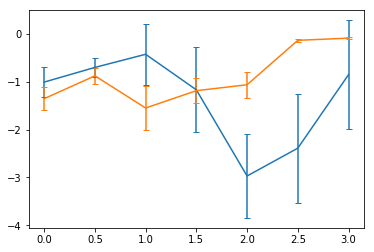

In [13]:
plt.errorbar(z, np.array(pt)[0],yerr=error, fmt='-',capsize=3)
plt.errorbar(z, np.array(wz)[0],yerr=sigma_wz, fmt='-',capsize=3)

# Version reducida

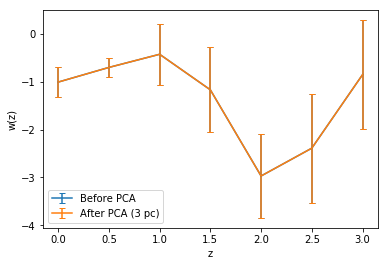

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n_pca = 7

matriz_cov = np.loadtxt('owaCDM2_cov.txt')
matriz_cov = np.matrix(matriz_cov)
error = np.sqrt(np.diag(matriz_cov))
fisher = np.linalg.inv(matriz_cov)
fish_eig = np.linalg.eig(fisher)

d = np.diag(fish_eig[0])
w = np.transpose(fish_eig[1])
wt = fish_eig[1]
pt = [-1.0048, -0.697779, -0.422577, -1.16662, -2.97, -2.38769, -0.849161]
z = [ 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
pt = np.matrix(pt)
p = np.transpose(pt)
q = np.matmul(w,p)

wz = w[0]*np.asscalar(q[0])
for ii in range(n_pca-1):
    wz += w[ii+1]*np.asscalar(q[ii+1])

sigma_squared_q = 1/(np.diag(d))
sigma_wz = (sigma_squared_q[0])*(np.array(w[0])[0]**2)
for ii in range(n_pca-1):
    sigma_wz += (sigma_squared_q[ii+1])*(np.array(w[ii+1])[0]**2)
sigma_wz = sigma_wz**0.5
    
plt.errorbar(z, np.array(pt)[0],yerr=error, fmt='-',capsize=3)
plt.errorbar(z, np.array(wz)[0],yerr=sigma_wz, fmt='-',capsize=3)

plt.ylabel('w(z)')
plt.xlabel('z')

plt.legend(('Before PCA','After PCA (3 pc)'))

plt.savefig('wz_pca.pdf')

In [4]:
print wz

[[-0.97529433 -0.67561229 -0.35951265 -1.3878548  -3.14308345 -1.03248533
   0.46697167]]


# Corr. Func. Zhao

In [9]:
#primer prueba chafa de la integral
from scipy import integrate

eta_0 = 1
a_c = 1
dorito = 0.1
a_i = 1
a_j = 1

f = lambda a2, a : eta_0/(1+(abs(a-a2)/a_c)**2)

integrate.dblquad(f, a_i, a_i+dorito, lambda a2: a_j, lambda a2: a_j+dorito)[0]

0.009983399645064341

In [1]:
#aqui ya salen los datos y la matriz de covarianza
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

#dice "a" pero es "z"
n_datos = 20
a_c = 0.3
a_max = 3.0

eta_0 = (0.04*0.04*a_max)/(np.pi*a_c)
a_interv = np.linspace(0.01,a_max,n_datos)
dorito = a_interv[1] - a_interv[0]
C = np.zeros([len(a_interv),len(a_interv)])

z_interv = 1/a_interv-1
w_z = np.zeros(len(z_interv))
w_z = w_z-1 
datos = np.transpose(np.vstack([a_interv,w_z]))

f = lambda a2, a : eta_0/(1+(abs(a-a2)/a_c)**2)
for ii in range(len(a_interv)):
    for jj in range(len(a_interv)):
        C[ii,jj]+= (1/(dorito**2))*(integrate.dblquad(f, a_interv[ii], a_interv[ii]+dorito,
                    lambda a2: a_interv[jj], lambda a2: a_interv[jj]+dorito)[0])

In [4]:
np.savetxt('w_15bins_data.txt',datos)
np.savetxt('w_15bins_cov.txt',C)

In [5]:
print(datos)
print(C)

[[ 0.01       -1.        ]
 [ 0.22357143 -1.        ]
 [ 0.43714286 -1.        ]
 [ 0.65071429 -1.        ]
 [ 0.86428571 -1.        ]
 [ 1.07785714 -1.        ]
 [ 1.29142857 -1.        ]
 [ 1.505      -1.        ]
 [ 1.71857143 -1.        ]
 [ 1.93214286 -1.        ]
 [ 2.14571429 -1.        ]
 [ 2.35928571 -1.        ]
 [ 2.57285714 -1.        ]
 [ 2.78642857 -1.        ]
 [ 3.         -1.        ]]
[[4.73187158e-03 3.41690805e-03 1.76114041e-03 9.48489618e-04
  5.72747420e-04 3.78917472e-04 2.67929457e-04 1.99000415e-04
  1.53439587e-04 1.21824510e-04 9.90200221e-05 8.20445364e-05
  6.90745635e-05 5.89456694e-05 5.08867297e-05]
 [3.41690805e-03 4.73187158e-03 3.41690805e-03 1.76114041e-03
  9.48489618e-04 5.72747420e-04 3.78917472e-04 2.67929457e-04
  1.99000415e-04 1.53439587e-04 1.21824510e-04 9.90200221e-05
  8.20445364e-05 6.90745635e-05 5.89456694e-05]
 [1.76114041e-03 3.41690805e-03 4.73187158e-03 3.41690805e-03
  1.76114041e-03 9.48489618e-04 5.72747420e-04 3.78917472e-04
  

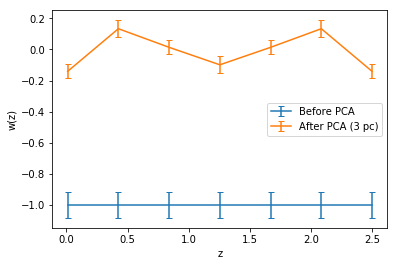

In [2]:
#intento de hacerle PCA a los priors, pero creo que esta mal, hay que hacerselo a los posteriors o algo asi

import numpy as np
import matplotlib.pyplot as plt

n_pca = 3

matriz_cov = np.loadtxt('w_7bins_cov.txt')
matriz_cov = np.matrix(matriz_cov)
error = np.sqrt(np.diag(matriz_cov))
fisher = np.linalg.inv(matriz_cov)
fish_eig = np.linalg.eig(fisher)

d = np.diag(fish_eig[0])
w = np.transpose(fish_eig[1])
wt = fish_eig[1]
pt = [-1, -1, -1, -1, -1, -1, -1]
z = [ 0.01, 0.425, 0.84, 1.255, 1.67, 2.085, 2.5]
pt = np.matrix(pt)
p = np.transpose(pt)
q = np.matmul(w,p)

wz = w[0]*np.asscalar(q[0])
for ii in range(n_pca-1):
    wz += w[ii+1]*np.asscalar(q[ii+1])

sigma_squared_q = 1/(np.diag(d))
sigma_wz = (sigma_squared_q[0])*(np.array(w[0])[0]**2)
for ii in range(n_pca-1):
    sigma_wz += (sigma_squared_q[ii+1])*(np.array(w[ii+1])[0]**2)
sigma_wz = sigma_wz**0.5
    
plt.errorbar(z, np.array(pt)[0],yerr=error, fmt='-',capsize=3)
plt.errorbar(z, np.array(wz)[0],yerr=sigma_wz, fmt='-',capsize=3)

plt.ylabel('w(z)')
plt.xlabel('z')

plt.legend(('Before PCA','After PCA (3 pc)'))

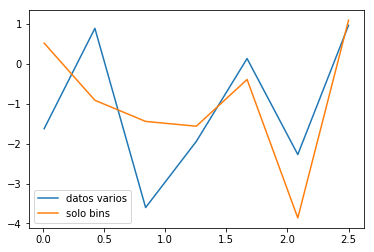

In [9]:
#grafica de los de mejor ajuste, aqui me di cuenta de que estaban mal los de eos_7bins
plt.plot(z,[-1.622, 0.894,-3.6,-1.94,0.137,-2.27,0.97])
plt.plot(z,[0.524,-0.91,-1.44,-1.56,-0.388,-3.86,1.0975])
plt.legend(('datos varios','solo bins'))

In [6]:
fisher

matrix([[145.11412013, -20.60741761,   0.4156029 ,  -0.71384971,
          -0.31044728,  -0.21232895,  -0.16539384],
        [-20.60741761, 148.04035712, -20.66667869,   0.51662169,
          -0.67057721,  -0.27982111,  -0.21232895],
        [  0.4156029 , -20.66667869, 148.04123672, -20.66917738,
           0.51468809,  -0.67057721,  -0.31044728],
        [ -0.71384971,   0.51662169, -20.66917738, 148.04408416,
         -20.66917738,   0.51662169,  -0.71384971],
        [ -0.31044728,  -0.67057721,   0.51468809, -20.66917738,
         148.04123672, -20.66667869,   0.4156029 ],
        [ -0.21232895,  -0.27982111,  -0.67057721,   0.51662169,
         -20.66667869, 148.04035712, -20.60741761],
        [ -0.16539384,  -0.21232895,  -0.31044728,  -0.71384971,
           0.4156029 , -20.60741761, 145.11412013]])

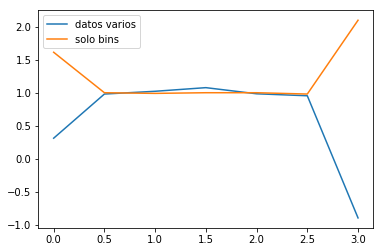

In [7]:
#grafica del owaCDM7bins
z = [0.0,0.5,1.0,1.5,2.0,2.5,3.0]
plt.plot(z,[0.31,0.98,1.022,1.077,0.9838,0.95383,-0.9])
plt.plot(z,[1.614,1.00,0.99,1.0,1.0,0.98,2.1])
plt.legend(('datos varios','solo bins'))

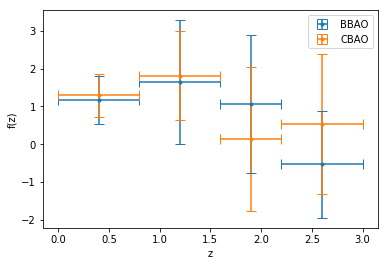

In [14]:
z = [0.4, 1.2, 1.9, 2.6]
zerr = [0.4, 0.4, 0.3, 0.4]
rho = [1.17, 1.64, 1.07, -0.53]
rhoerr = [0.63, 1.64, 1.83, 1.42]
plt.errorbar(z,rho,xerr=zerr, yerr=rhoerr, fmt='.', capsize=5)

z2 = [0.4, 1.2, 1.9, 2.6]
zerr2 = [0.4, 0.4, 0.3, 0.4]
rho2 = [1.295, 1.81, 0.13, 0.53]
rhoerr2 = [0.565, 1.18, 1.9, 1.85]
plt.errorbar(z2,rho2,xerr=zerr2, yerr=rhoerr2, fmt='.', capsize=5)

plt.ylabel('f(z)')
plt.xlabel('z')

plt.legend(('BBAO','CBAO'))
plt.savefig('rho_BBAOvsCBAO.pdf')

In [ ]:
#codigo para simplemc con prior flotante (intento al menos)

#original

from BaseLikelihood import BaseLikelihood
import scipy.linalg as la
import scipy as sp

class eosBinsZhaoLikelihood(BaseLikelihood):
    def __init__(self,name,values_filename, cov_filename):
        BaseLikelihood.__init__(self,name)
        print("Loading ",values_filename)
        da = sp.loadtxt(values_filename)
        self.zs = da[:,0]
        self.Hs = da[:,1]
        print("Loading ",cov_filename)
        cov = sp.loadtxt(cov_filename,skiprows=1)
        assert(len(cov) == len(self.zs))
        vals, vecs = la.eig(cov)
        vals = sorted(sp.real(vals))
        print("Eigenvalues of cov matrix:", vals[0:3],'...',vals[-1])
        print("Adding marginalising constant")
        cov += 3**2
        self.icov = la.inv(cov)


    def loglike(self):
        tvec = sp.array([self.theory_.luisfunction(z)[0] for z in self.zs])
        #print tvec, self.Hs
        ## This is the factor that we need to correct
        ## note that in principle this shouldn't matter too much, we will marginalise over this
        tvec += 0
        delta = tvec - self.Hs
        return -sp.dot(delta, sp.dot(self.icov, delta))/2.0


class w_7bins(eosBinsZhaoLikelihood):
    # data from https://arxiv.org/abs/1802.01505
    def __init__(self):
        eosBinsZhaoLikelihood.__init__(self,"bins","data/w_7bins_data.txt",
                                             "data/w_7bins_cov.txt")
class density_7bins(eosBinsZhaoLikelihood):
    # data from https://arxiv.org/abs/1802.01505
    def __init__(self):
        eosBinsZhaoLikelihood.__init__(self,"bins_rho","data/rho_7bins_data.txt",

                                       
#copia modificable (esta es la que voy a modificar para hacer bien el codigo, la de arriba solo es para referencia)

from BaseLikelihood import BaseLikelihood
import scipy.linalg as la
from scipy import integrate
import scipy as sp
import numpy as np
                                       
class eosBinsZhaoLikelihood(BaseLikelihood):
    def __init__(self,name,values_filename, cov_filename):
        BaseLikelihood.__init__(self,name)
        print("Loading ",values_filename)
                                      
        print("Loading ",cov_filename)
        cov = sp.loadtxt(cov_filename,skiprows=1)
                                       
        zs = np.linspace(0.01,3.0,15)                               
        assert(len(cov) == len(zs))
        vals, vecs = la.eig(cov)
        vals = sorted(sp.real(vals))
        print("Eigenvalues of cov matrix:", vals[0:3],'...',vals[-1])
        print("Adding marginalising constant")
        cov += 3**2
        self.icov = la.inv(cov)


    def loglike(self):
                                       
        zs = np.linspace(0.01,3.0,15)
        w_flotante = np.zeros(len(zs))
        for ii in range(len(zs)):
            z_c = 0.3
            jj = ii
            N = 0
            while(abs(zs[jj]-zs[ii])<=z_c):
                w_flotante[ii]+= self.theory_.luisfunction(zs[jj])[0]
                N+=1
                jj+=1
            jj = ii
            while(abs(zs[jj-1]-zs[ii])<=z_c):
                w_flotante[ii]+= self.theory_.luisfunction(zs[jj-1])[0]
                N+=1
                jj-=1
            w_flotante[ii] = w_flotante[ii]/N               
        Hs = w_flotante

        tvec = sp.array([self.theory_.luisfunction(z)[0] for z in zs])
        tvec += 0
        delta = tvec - Hs
        return -sp.dot(delta, sp.dot(self.icov, delta))/2.0


class w_7bins(eosBinsZhaoLikelihood):
    def __init__(self):
        eosBinsZhaoLikelihood.__init__(self,"bins","data/w_7bins_data.txt",
                                             "data/w_7bins_cov.txt")
class density_7bins(eosBinsZhaoLikelihood):
    def __init__(self):
        eosBinsZhaoLikelihood.__init__(self,"bins_rho","data/rho_7bins_data.txt",
                                        
                                       

In [13]:
#algoritmo para crear los priors promedios flotantes
w_flotante = np.zeros(len(zs))
for ii in range(len(zs)):
    z_c = 1
    jj = ii
    N = 0
    while(abs(zs[jj]-zs[ii])<=z_c):
        w_flotante[ii]+=teoria.w
        N+=1
        jj+=1
    jj = ii
    while(abs(zs[ii]-zs[jj-1])<=z_c):
        w_flotante[ii]+=teoria.w
        N+=1
    w_flotante[ii] = w_flotante[ii]/N
        


array([0.01      , 0.22357143, 0.43714286, 0.65071429, 0.86428571,
       1.07785714, 1.29142857, 1.505     , 1.71857143, 1.93214286,
       2.14571429, 2.35928571, 2.57285714, 2.78642857, 3.        ])

In [16]:
zs = np.linspace(0,5,10)
zz = zs[-2]

[9.61372622e+00 6.24390810e+00 1.66154381e+00 4.58051074e-01
 1.06510040e-01 3.22276436e-02 1.28963409e-02 5.36682109e-03
 2.56414411e-03 1.30890793e-03 7.40937460e-04 4.25189409e-04
 2.64974873e-04 1.79037046e-04 1.38426467e-04]
[3.50926139 2.48159272 2.00004139 1.18375553 0.99176042 0.72851973
 0.59456214 0.43916175 0.2731597  0.204632   0.11614691 0.00413088
 0.01511161 0.01010834 0.04335642]
[7.29899208e+00 1.14045217e+00 4.49206607e-01 1.54971386e-01
 5.16064886e-02 2.08867800e-02 9.89786806e-03 4.34778101e-03
 2.29934184e-03 1.29554446e-03 7.34658836e-04 4.22131930e-04
 2.62005067e-04 1.84484723e-04 1.36875562e-04]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


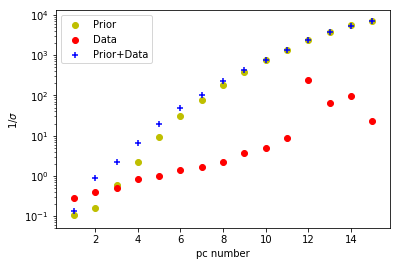

In [2]:
#viendo los eigenvalores de los 15 escalones con prior flotante para ver como varian con y sin datos

import numpy as np
import matplotlib.pyplot as plt

n_pca = 15

matriz_cov = np.loadtxt('corrfunczhao_tanh_cov.txt')
matriz_cov = np.matrix(matriz_cov)
sigma_corr = np.linalg.eig(matriz_cov)[0]

matriz_cov2 = np.loadtxt('corrfunczhao_solodatos_tanh_cov.txt')
matriz_cov2 = np.matrix(matriz_cov2)
sigma_corr2 = np.linalg.eig(matriz_cov2)[0]


matriz_cov3 = np.loadtxt('corrfunczhao_datos+priorflot_tanh_cov.txt')
matriz_cov3 = np.matrix(matriz_cov3)
sigma_corr3 = np.linalg.eig(matriz_cov3)[0]



z = np.linspace(1,n_pca,n_pca)

print sigma_corr
print sigma_corr2
print sigma_corr3
print z

#plt.rc('text', usetex=False)

plt.scatter(z,1/sigma_corr, c='y')
plt.scatter(z,1/sigma_corr2, c='r')
plt.scatter(z,1/sigma_corr3, marker='+', c='b')
plt.yscale('log')

plt.ylabel(r'1/$\sigma$')
plt.xlabel('pc number')
plt.legend(('Prior','Data','Prior+Data'))
plt.savefig('pc_modes_data+prior.pdf')

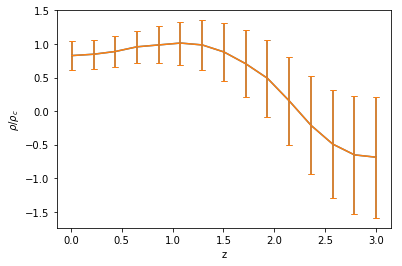

In [23]:
#pca para los 15 bines con datos+zhao
import numpy as np
import matplotlib.pyplot as plt

n_pca = 15

matriz_cov = np.loadtxt('corrfunczhao_datos+priorflot_tanh_cov.txt')
matriz_cov = np.matrix(matriz_cov)
error = np.sqrt(np.diag(matriz_cov))
fisher = np.linalg.inv(matriz_cov)
fish_eig = np.linalg.eig(fisher)

d = np.diag(fish_eig[0])
w = np.transpose(fish_eig[1])
wt = fish_eig[1]
pt = [1.183, 1.212, 1.27, 1.37, 1.41, 1.45, 1.41, 1.26, 1.01, 0.7, 0.22, -0.3, -0.7, -0.93, -0.98]
z = np.linspace(0.01,3.0,15)
pt = np.matrix(pt)
p = np.transpose(pt)
q = np.matmul(w,p)

wz = w[0]*np.asscalar(q[0])
for ii in range(n_pca-1):
    wz += w[ii+1]*np.asscalar(q[ii+1])

sigma_squared_q = 1/(np.diag(d))
sigma_wz = (sigma_squared_q[0])*(np.array(w[0])[0]**2)
for ii in range(n_pca-1):
    sigma_wz += (sigma_squared_q[ii+1])*(np.array(w[ii+1])[0]**2)
sigma_wz = sigma_wz**0.5
    
plt.errorbar(z, 0.7*np.array(pt)[0],yerr=0.7*error, fmt='-',capsize=3)
plt.errorbar(z, 0.7*np.array(wz)[0],yerr=0.7*sigma_wz, fmt='-',capsize=3)

plt.ylabel(r'$\rho/\rho_c$')
plt.xlabel('z')

#plt.legend(('Before PCA','After PCA (3 pc)'))

plt.savefig('rho_15bins_datos+zhao.pdf')

In [3]:
#H(z)/n
#np.matrix(C)

[3.05933529e+00 1.19962302e+00 7.69974733e-01 2.81409684e-01
 9.05081108e-02 3.04422036e-02 1.21169920e-02 5.10663132e-03
 2.49805010e-03 1.29839754e-03 7.45070422e-04 4.12830690e-04
 2.57705135e-04 1.73314600e-04 1.33540300e-04]
[1.25197901 1.21583344 1.16440809 1.1720514  0.8097057  0.00273206
 0.01018413 0.02464822 0.10678755 0.20380496 0.23058349 0.30307216
 0.29468967 0.28080439 0.25611734]
[0.63313332 0.49356038 0.25511134 0.1590719  0.13935331 0.00336236
 0.11504444 0.10927813 0.09567672 0.01671813 0.07220463 0.05483533
 0.04850967 0.03920188 0.03869919]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


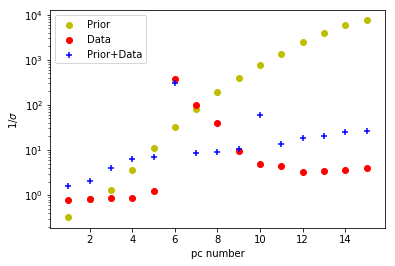

In [8]:
#viendo los eigenvalores de los 15 escalones con prior flotante para ver como varian con y sin datos
#aqui ya puse para borrar los primeros 3 elementos de la matriz, los correspondientes a h,Om,Obh2

import numpy as np
import matplotlib.pyplot as plt


n_pca = 18
n_erase = 3
file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'



#matriz_cov = np.loadtxt(file_root+'rho_tanh20_phy_rho_corr+HD+SN+CBAO+Planck_nested_dynesty_multi_cov.txt')
matriz_cov = np.loadtxt(file_root+'rho_nodal_phy_rho_corr_nested_dynesty_multi_cov.txt')
matriz_cov = np.matrix(matriz_cov)
matriz_cov = np.delete(np.delete(matriz_cov, range(n_erase),axis=1),range(n_erase),axis=0)
sigma_corr = np.linalg.eig(matriz_cov)[0]

#matriz_cov2 = np.loadtxt(file_root+'rho_tanh20_phy_rho_corr+HD+SN+CBAO+Planck_nested_dynesty_multi_cov.txt')
matriz_cov2 = np.loadtxt(file_root+'rho_tanh15_phy_CBAO+HD+SN_nested_dynesty_multi_cov.txt')
matriz_cov2 = np.matrix(matriz_cov2)
matriz_cov2 = np.delete(np.delete(matriz_cov2, range(n_erase),axis=1),range(n_erase),axis=0)
sigma_corr2 = np.linalg.eig(matriz_cov2)[0]

#matriz_cov3 = np.loadtxt(file_root+'rho_tanh20_phy_rho_corr+HD+SN+CBAO+Planck_nested_dynesty_multi_cov.txt')
matriz_cov3 = np.loadtxt(file_root+'rho_tanh15_eta0_distinct_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi_cov.txt')
#matriz_cov3 = np.loadtxt(file_root+'rho_tanh15_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi_cov.txt')
matriz_cov3 = np.matrix(matriz_cov3)
matriz_cov3 = np.delete(np.delete(matriz_cov3, range(n_erase),axis=1),range(n_erase),axis=0)
sigma_corr3 = np.linalg.eig(matriz_cov3)[0]


n_pca -= n_erase
z = np.linspace(1,n_pca,n_pca)

print sigma_corr
print sigma_corr2
print sigma_corr3
print z

#plt.rc('text', usetex=False)

plt.scatter(z,1/sigma_corr, c='y')
plt.scatter(z,1/sigma_corr2, c='r')
plt.scatter(z,1/sigma_corr3, marker='+', c='b')
plt.yscale('log')

plt.ylabel(r'1/$\sigma$')
plt.xlabel('pc number')
plt.legend(('Prior','Data','Prior+Data'))
#plt.savefig('pc_modes_data+prior.pdf')

# PCA para la nodal

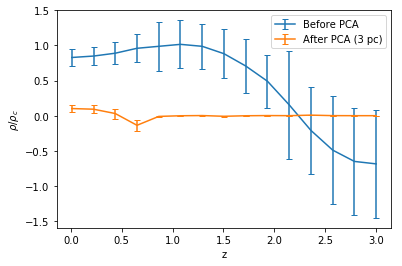

In [18]:
import numpy as np
import matplotlib.pyplot as plt

n_pca = 3
n_erase = 3


file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'rho_nodal6_priorredux2_phy_CBAO+HD+SN_nested_dynesty_multi_cov.txt'
#file_root += 'rho_tanh15_eta0_distinct_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi_cov.txt'
#file_root += 'rho_tanh15_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi_cov.txt'
file_root += 'rho_tanh15_phy_CBAO+HD+SN_nested_dynesty_multi_cov.txt'
#file_root += 'rho_nodal6_phy_CBAO+HD+SN_nested_dynesty_multi_cov.txt'



#las primeras 3 instrucciones son para borrar los de los otros 3 elementos de la matriz de los params que no nos importan
matriz_cov = np.loadtxt(file_root)
matriz_cov = np.matrix(matriz_cov)
matriz_cov = np.delete(np.delete(matriz_cov, range(n_erase),axis=1),range(n_erase),axis=0)

error = np.sqrt(np.diag(matriz_cov))
fisher = np.linalg.inv(matriz_cov)
fish_eig = np.linalg.eig(fisher)


#n_pca -= n_erase
d = np.diag(fish_eig[0])
w = np.transpose(fish_eig[1])
wt = fish_eig[1]
#pt = [0.96, 0.98, 0.876, 1.05, 0.84, 0.95, 0.974, 0.87, 0.904, 0.907, -0.25, -0.3684, -0.24, -0.26, -0.25] #rho_nodal6_priorredux2
#pt = [1.03, 1.041, 1.03, 0.768, -0.58, 0.0005] #rho_nodal6
pt = [1.183, 1.212, 1.27, 1.37, 1.41, 1.45, 1.41, 1.26, 1.01, 0.7, 0.22, -0.3, -0.7, -0.93, -0.98] 


z = np.linspace(0.01,3.0,15)
pt = np.matrix(pt)
p = np.transpose(pt)
q = np.matmul(w,p)

wz = w[0]*np.asscalar(q[0])
for ii in range(n_pca-1):
    wz += w[ii+1]*np.asscalar(q[ii+1])

sigma_squared_q = 1/(np.diag(d))
sigma_wz = (sigma_squared_q[0])*(np.array(w[0])[0]**2)
for ii in range(n_pca-1):
    sigma_wz += (sigma_squared_q[ii+1])*(np.array(w[ii+1])[0]**2)
sigma_wz = sigma_wz**0.5
    
plt.errorbar(z, 0.7*np.array(pt)[0],yerr=0.7*error, fmt='-',capsize=3)
plt.errorbar(z, 0.7*np.array(wz)[0],yerr=0.7*sigma_wz, fmt='-',capsize=3)

plt.ylabel(r'$\rho/\rho_c$')
plt.xlabel('z')

plt.legend(('Before PCA','After PCA ('+str(n_pca)+' pc)'))
plt.savefig('pca_rho_15nodal.pdf')

In [11]:
#eigenvalores normalizados para la celda de arriba
x=0
for ii in range(len(d)):
    x+=d[ii,ii]
for ii in range(len(d)):
    print(1/x*d[ii,ii])

0.675169427065707
0.18112551152257053
0.07483726531433106
0.017273597144003228
0.009050835214250324
0.007999727574764763
0.007202187612389104
0.006569003774301796
0.006259483349092279
0.006086356160785868
0.0022781179710335037
0.0014733514666895363
0.0015171528068928743
0.0015841568955363718
0.001573826127651781


## PCA para pantheon completo

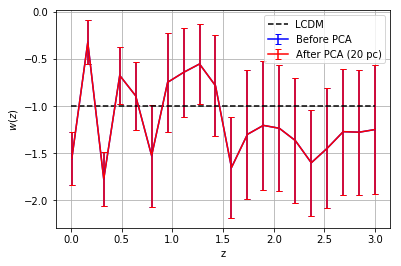

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n_pca = 20
n_erase = 3
type_graph = 'eos' # eos o rho

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao_new\\'
#file_root += 'rho_tanh20_phy_rho_corr+Pantheon+CBAO+HD_nested_dynesty_multi_cov.txt'
file_root += 'eos_tanh20_phy_Pantheon+CBAO+HD_nested_dynesty_multi_cov.txt'




#las primeras 3 instrucciones son para borrar los de los otros 3 elementos de la matriz de los params que no nos importan
matriz_cov = np.loadtxt(file_root)
matriz_cov = np.matrix(matriz_cov)
matriz_cov = np.delete(np.delete(matriz_cov, range(n_erase),axis=1),range(n_erase),axis=0)

error = np.sqrt(np.diag(matriz_cov))
fisher = np.linalg.inv(matriz_cov)
fish_eig = np.linalg.eig(fisher)


#n_pca -= n_erase
d = np.diag(fish_eig[0])
w = np.transpose(fish_eig[1])
wt = fish_eig[1]

#pt = [0.963,1.00,1.167,0.327,-0.199,-0.062] #rho_tanh6
#pt=[0.906,1.021,0.649,0.9827,1.0031,0.7694,0.8574,0.9321,0.9531,0.8574,0.37493,0.22137,0.11638,-0.0045,-0.1894,-0.35155,-0.21086,-0.0903,0.01655,-0.01034] #rho_tanh20_rho_corr
#pt=[-1.4583,-0.4294,-1.6647,-0.6989,-0.9571,-1.3108,-0.847,-0.6128,-0.5404,-0.8275,-1.5287,-1.3872,-1.2528,-1.2669,-1.3894,-1.5686,-1.4572,-1.3201,-1.2627,-1.2591] #eos_tanh20_eos_corr
pt= [-1.5577,-0.3223,-1.7731,-0.6739,-0.8901,-1.5249,-0.7471,-0.6417,-0.5523,-0.7834,-1.6511,-1.2987,-1.2034,-1.2344,-1.3646,-1.6,-1.4456,-1.27,-1.2758,-1.2474] #eos_tanh20  



z = np.linspace(0.01,3.0,len(pt))
pt = np.matrix(pt)
p = np.transpose(pt)
q = np.matmul(w,p)
sigma_squared_q = 1/(np.diag(d))

sigma_squared_q, q, w = zip(*sorted(zip(sigma_squared_q,q,w)))


wz = w[0]*np.asscalar(q[0])
for ii in range(n_pca-1):
    wz += w[ii+1]*np.asscalar(q[ii+1])

#sigma_squared_q = 1/(np.diag(d))
sigma_wz = (sigma_squared_q[0])*(np.array(w[0])[0]**2)
for ii in range(n_pca-1):
    sigma_wz += (sigma_squared_q[ii+1])*(np.array(w[ii+1])[0]**2)
sigma_wz = sigma_wz**0.5

plt.rc('font', size=10)
if type_graph=='rho':
    plt.errorbar(z, 0.7*np.array(pt)[0],yerr=0.7*error, fmt='-',capsize=3,color='b')
    plt.errorbar(z, 0.7*np.array(wz)[0],yerr=0.7*sigma_wz, fmt='-',capsize=3,color='r')
    plt.grid(axis = 'both')
    plt.ylabel(r'$\rho/\rho_c$')
elif type_graph=='eos':
    plt.errorbar(z, np.array(pt)[0],yerr=error, fmt='-',capsize=3,color='b')
    plt.errorbar(z, np.array(wz)[0],yerr=sigma_wz, fmt='-',capsize=3,color='r')
    plt.grid(axis = 'both')
    plt.ylabel(r'$w(z)$')

plt.xlabel('z')

z_lcdm = np.linspace(0,3,100)
lcdm = np.empty(100)
if type_graph=='eos':
    lcdm.fill(-1)
elif type_graph=='rho':
    lcdm.fill(0.7)
plt.plot(z_lcdm,lcdm, linestyle='--', color='k')


plt.legend(('LCDM','Before PCA','After PCA ('+str(n_pca)+' pc)'))
plt.savefig('pca_eos_20bin_pantheon.pdf')

In [6]:
x=0
lista=[]
for ii in range(len(d)):
    x+=d[ii,ii]
for ii in range(len(d)):
    lista+=[1/x*d[ii,ii]]
    #print(1/x*d[ii,ii])
print sorted(lista)

[0.006950385819809579, 0.007220495945905645, 0.00731299137679188, 0.007461956815455841, 0.007710623314668626, 0.007740982144830645, 0.00783680480094096, 0.007964888338630708, 0.008041996278193995, 0.008636142153482273, 0.013524806656192063, 0.013992383670847012, 0.014983201285207807, 0.017434143678651513, 0.022196586723781418, 0.031809229308587254, 0.039299991135447826, 0.08877350724638394, 0.24706103356754947, 0.43404784973864147]


In [7]:
list1 = sigma_squared_q
list2 = q
list3 = w
list1, list2, list3 = zip(*sorted(zip(list1, list2, list3)))
#list1
#(1, 1, 2, 3, 4)
#list2 
#('one', 'one2', 'two', 'three', 'four')

In [8]:
(list1)/sum((list1))

array([0.00135975, 0.00238887, 0.00664834, 0.01501772, 0.01855425,
       0.0265895 , 0.0338529 , 0.03939053, 0.04217982, 0.04363805,
       0.06834027, 0.07338927, 0.07409975, 0.07531083, 0.07624307,
       0.07654326, 0.07909403, 0.08070517, 0.08173902, 0.08491561])

In [9]:
normalized = list1/sum(list1)
sum(normalized[0:5])

0.04396891983898621

In [10]:
sigma_squared_q

(0.007986405590600591,
 0.014030873762992956,
 0.039048611249749336,
 0.08820567317161943,
 0.10897724494082717,
 0.1561718572714995,
 0.1988329474412692,
 0.23135791262199373,
 0.2477406462891117,
 0.2563054882676487,
 0.4013924402973258,
 0.4310474730186428,
 0.43522043578790404,
 0.44233361194917514,
 0.44780909048546713,
 0.44957223719465644,
 0.4645540385011045,
 0.4740169918348181,
 0.48008920712801,
 0.49874672624084976)